In [1]:
import sys
sys.path.append('..')
import numpy as np
from src.data import jjt
from src.models.layers import MatMul, SoftmaxWithLoss
from src.common.util import preprocess, create_contexts_target, convert_one_hot
from src.common.trainer import Trainer
from src.common.optimizer import Adam
from src.data import jjt

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| epoch 1 |  iter 1 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 21 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 41 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 61 / 119 | time 0[s] | loss 7.79
| epoch 1 |  iter 81 / 119 | time 0[s] | loss 7.77
| epoch 1 |  iter 101 / 119 | time 1[s] | loss 7.73
| epoch 2 |  iter 1 / 119 | time 1[s] | loss 7.69
| epoch 2 |  iter 21 / 119 | time 1[s] | loss 7.60
| epoch 2 |  iter 41 / 119 | time 1[s] | loss 7.52
| epoch 2 |  iter 61 / 119 | time 1[s] | loss 7.43
| epoch 2 |  iter 81 / 119 | time 1[s] | loss 7.32
| epoch 2 |  iter 101 / 119 | time 1[s] | loss 7.20
| epoch 3 |  iter 1 / 119 | time 2[s] | loss 7.10
| epoch 3 |  iter 21 / 119 | time 2[s] | loss 6.93
| epoch 3 |  iter 41 / 119 | time 2[s] | loss 6.80
| epoch 3 |  iter 61 / 119 | time 2[s] | loss 6.63
| epoch 3 |  iter 81 / 119 | time 2[s] | loss 6.52
| epoch 3 |  iter 101 / 119 | time 2[s] | loss 6.41
| epoch 4 |  iter 1 / 119 | time 3[s] | loss 6.16
| epoch 4 |  iter 21 / 119 | tim

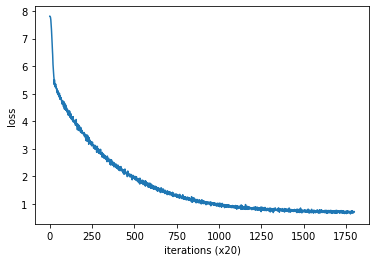

In [3]:
window_size = 1
hidden_size = 20
batch_size = 100
max_epoch = 300

#text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = jjt.load_data()

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [4]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

悪魔 [ 1.5377853e+00  4.0348986e-01 -5.0390524e-01  2.9820850e+00
  1.2294844e+00 -8.2600075e-01 -5.0257039e-01 -6.0505623e-01
 -1.5958097e+00  7.5599544e-02  1.2921035e+00  3.3780628e-01
  2.7694681e-03 -1.5300895e+00  2.2592826e+00 -2.2967890e-01
  1.4038815e+00 -2.1300707e+00  1.1973583e+00 -1.8786403e+00]
の [-4.6996913  -0.48456603  1.2269932  -0.9595684   1.5780259  -3.0850585
 -0.9890176   2.265322   -0.5607233   3.032511    0.48384112  2.553551
 -2.5980868   0.18318635  1.7022142   1.3476707  -3.2698247   1.2644489
  1.4063661   1.2597828 ]
笑い [-0.20198259  2.8394775  -0.9974441   1.1062495  -1.9031321   0.92413723
 -0.6744309   2.1795394  -3.9409401   0.737713    2.4566672   0.17306495
 -1.2931913  -0.34863877 -1.325328    1.1865921   2.7685533   2.507191
  2.1886075   0.24915539]
方 [ 0.3495508   1.4748126   1.8953546   1.91649     4.103033    2.311062
 -1.8367178  -2.830768    0.7451048   1.8659009   0.8137636  -0.09577883
  0.0443374  -0.67113155  1.4582198  -0.2819814   0.1485